<a href="https://colab.research.google.com/github/vaidikk10/TinyML/blob/learning/Getting_Started_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.1.5** **First Neural Network**

In [1]:
from tensorflow import keras
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Data, y= 2x - 1
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# Training
model.fit(x,y,epochs=500)

In [ ]:
# Test
print(model.predict([10.0, 1.0, 0.0, -1.0]))

1/1 [==============================] - 0s 156ms/step
[[18.97785  ]
 [ 1.0067428]
 [-0.990047 ]
 [-2.986837 ]]


# K-means Clustering for Anomaly Detection


---



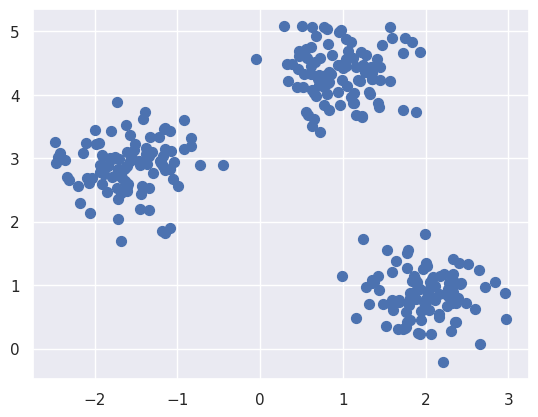

In [6]:
from sklearn.datasets import make_blobs

# Generating data for Cluster
num_centers = 3
X_train, y_train_true = make_blobs(n_samples=300, centers=num_centers,
                                   cluster_std=0.40, random_state=0)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_centers)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


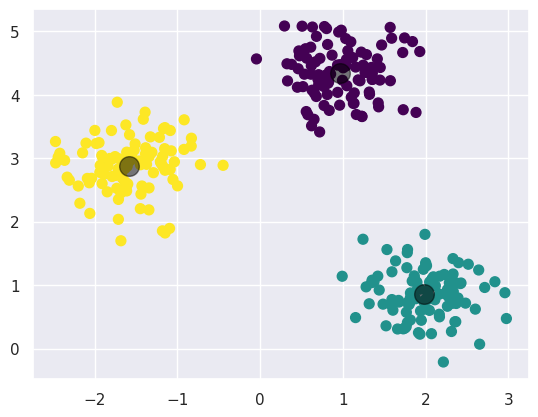

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

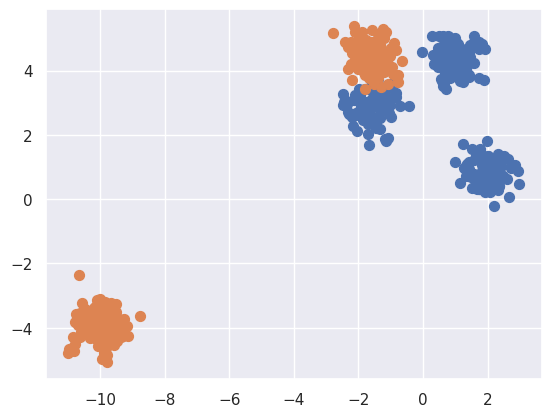

In [10]:
# Random data
X_anomaly, y_anomaly_true = make_blobs(n_samples=300, centers=2,
                       cluster_std=0.40, random_state=1)
plt.scatter(X_train[:, 0], X_train[:, 1], s=50);
plt.scatter(X_anomaly[:,0], X_anomaly[:,1], s=50);

In [18]:
percentile_treshold = 99

train_distances = kmeans.transform(X_train)

center_distances = {key: [] for key in range(num_centers)}
for i in range(len(y_kmeans)):
  min_distance = train_distances[i][y_kmeans[i]]
  center_distances[y_kmeans[i]].append(min_distance)

center_99percentile_distance = {key: np.percentile(center_distances[key], \
                                                   percentile_treshold)   \
                                for key in center_distances.keys()}

print(center_99percentile_distance)



{0: 1.0315363528478958, 1: 1.0917976541677412, 2: 1.1415867080723232}


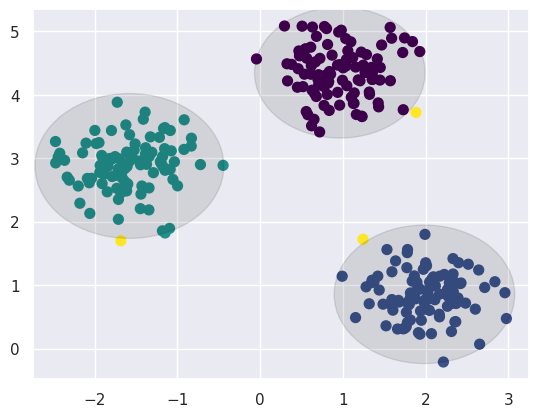

In [19]:
fig, ax = plt.subplots()

colors = []
for i in range(len(X_train)):
  min_distance = train_distances[i][y_kmeans[i]]
  if (min_distance > center_99percentile_distance[y_kmeans[i]]):
    colors.append(4)
  else:
    colors.append(y_kmeans[i])


ax.scatter(X_train[:, 0], X_train[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

Normal datapoints misclassified as abnormal:  3
Abnormal datapoints misclassified as normal:  17


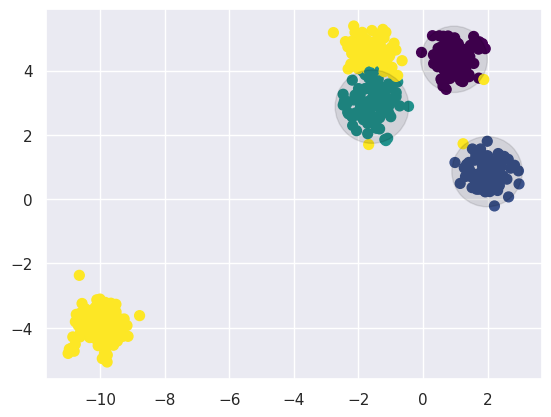

In [20]:
fig, ax = plt.subplots()

anomaly_distances = kmeans.transform(X_anomaly)
y_anomaly = kmeans.predict(X_anomaly)

#combine all the data
combined_distances = [*train_distances, *anomaly_distances]
combined_y = [*y_kmeans, *y_anomaly]
all_data = np.array([*X_train, *X_anomaly])

false_neg=0
false_pos=0

colors = []
for i in range(len(all_data)):
  min_distance = combined_distances[i][combined_y[i]]
  if (min_distance > center_99percentile_distance[combined_y[i]]):
    colors.append(4)
    if (i<300): #training data is the first 300 elements in the combined list
      false_pos+=1
  else:
    colors.append(combined_y[i])
    if (i>=300):
      false_neg+=1

ax.scatter(all_data[:, 0], all_data[:, 1], c=colors, s=50, cmap='viridis')

for i in range(len(centers)):
  circle = plt.Circle((centers[i][0], centers[i][1]),center_99percentile_distance[i], color='black', alpha=0.1);
  ax.add_artist(circle)

print('Normal datapoints misclassified as abnormal: ', false_pos)
print('Abnormal datapoints misclassified as normal: ', false_neg)

# K-means on Digits

---

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

normal_data = []
abnormal_data = []

normal_label = []
abnormal_label = []

num_clusters = 8

for i in range(len(digits.target)):
  if digits.target[i]<10-num_clusters:
    abnormal_data.append(digits.data[i])
    abnormal_label.append(digits.target[i])
  else:
    normal_data.append(digits.data[i])
    normal_label.append(digits.target[i])

In [27]:
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
clusters = kmeans.fit_predict(normal_data)

kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(8, 64)

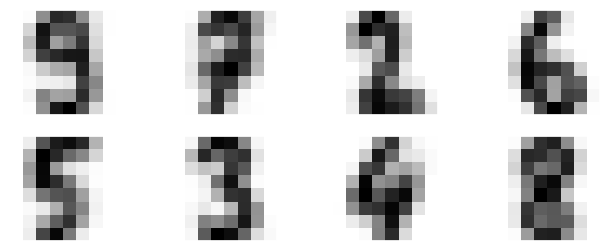

In [28]:
fig, ax = plt.subplots(2, int(num_clusters/2), figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(num_clusters, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [46]:
# 99th Percentile Boundary
percentile_treshold = 99
normal_y = kmeans.predict(normal_data)
normal_distances = kmeans.transform(normal_data)
center_distances = {key: [] for key in range(num_clusters)}

for i in range(len(normal_y)):
  min_distance = normal_distances[i][normal_y[i]]
  center_distances[normal_y[i]].append(min_distance)

center_99percentile_distance = {key : np.percentile(center_distances[key], percentile_treshold) for key in center_distances.keys()}
center_99percentile_distance

{0: 39.91689814057058,
 1: 40.4457496790435,
 2: 34.48686817044241,
 3: 33.49012149177819,
 4: 36.042201290733075,
 5: 36.35108790416124,
 6: 38.30619421761721,
 7: 39.65958713422169}

# Autoencoders for Anomaly Detection


---



In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [54]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.sample(n=5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
1734,-0.776901,-2.387049,-3.405666,-4.279135,-4.559530,-3.849366,-2.805222,-1.670297,-1.171902,-0.633994,...,0.635859,0.449270,-0.164469,-0.713304,-1.293700,-1.438508,-0.853304,-0.371484,-1.548866,1.0
4095,2.026448,1.048910,-0.232473,-1.080914,-1.712103,-2.033359,-2.370825,-2.659433,-2.677917,-2.640261,...,-1.643998,-2.190576,-2.851897,-3.412434,-3.789756,-3.499637,-2.466899,-1.599281,-0.108620,0.0
4492,-1.234734,-2.076354,-2.642847,-3.076300,-3.148096,-2.936488,-2.316472,-1.810189,-1.559392,-1.362340,...,1.771977,1.555819,1.636099,2.134141,2.439228,2.161562,1.730678,1.467779,1.554551,0.0
314,0.950865,0.346364,-0.406810,-1.161859,-1.654386,-2.266043,-2.635737,-2.616560,-2.423133,-1.967679,...,-1.061523,-1.596747,-2.328548,-2.850131,-3.644627,-4.212580,-3.795369,-3.711381,-1.627290,0.0
2322,-1.064192,-3.443243,-4.027654,-4.020169,-3.415319,-3.359948,-2.466214,-1.352067,-1.096433,-0.742917,...,1.507162,0.938115,-0.180450,-0.850571,-1.320206,-1.321432,-0.643218,-0.363789,-2.307884,1.0


In [57]:
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data,labels,test_size=0.2, random_state=21
)

In [61]:
# Normalizing data between [0,1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)
range = max_val - min_val

train_data = (train_data - min_val) / range
test_data = (test_data - min_val) / range

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

In [122]:
# Seprating normal vs abnormal

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data  = test_data[test_labels]

abnormal_train_data = train_data[~train_labels]
abnormal_test_data = test_data[~test_labels]

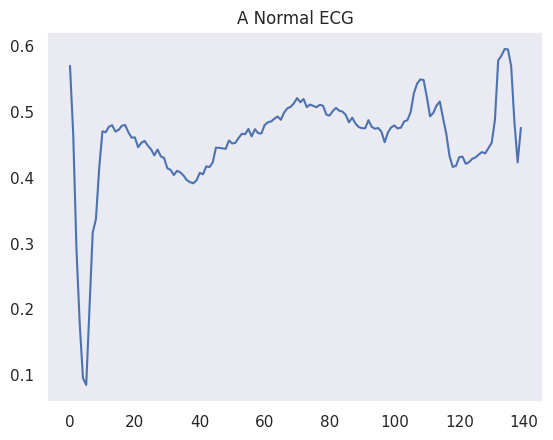

In [74]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

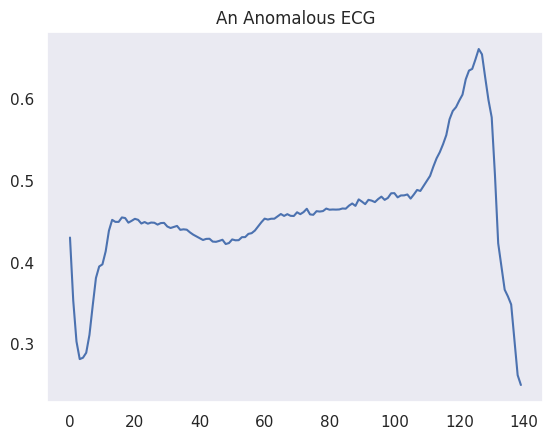

In [78]:
plt.grid()
plt.plot(np.arange(140), abnormal_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

In [108]:
# Building the Model

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(8, activation="relu")])

    self.decoder = tf.keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(140, activation="sigmoid")
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

5/5 [==============================] - 0s 18ms/step - loss: 0.0125 - val_loss: 0.0256
Epoch 90/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0125 - val_loss: 0.0255
Epoch 91/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0125 - val_loss: 0.0255
Epoch 92/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0125 - val_loss: 0.0255
Epoch 93/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0125 - val_loss: 0.0254
Epoch 94/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0124 - val_loss: 0.0255
Epoch 95/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0124 - val_loss: 0.0255
Epoch 96/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0125 - val_loss: 0.0254
Epoch 97/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0125 - val_loss: 0.0253
Epoch 98/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0125 - val_loss: 0.0254
Epoch 99/100
5/5 [=====

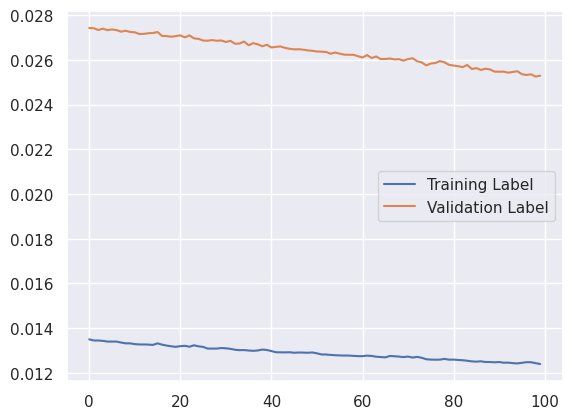

In [119]:
model = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=100,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)
plt.plot(model.history["loss"], label="Training Label")
plt.plot(model.history["val_loss"], label="Validation Label")
plt.legend()

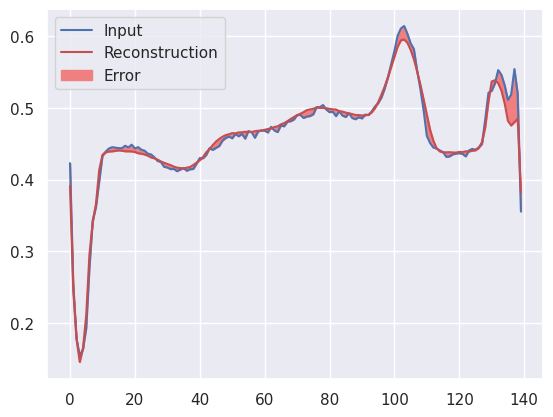

In [120]:
# Plot for normal

encoded_output_test = autoencoder.encoder(normal_test_data).numpy()
decoded_output_test = autoencoder.decoder(encoded_output_test).numpy()

i = 100
plt.plot(normal_test_data[i], 'b', label="Input")
plt.plot(decoded_output_test[i], 'r', label="Reconstruction")
plt.fill_between(np.arange(140), decoded_output_test[i], normal_test_data[i], color='lightcoral', label="Error")
plt.legend()
plt.show()

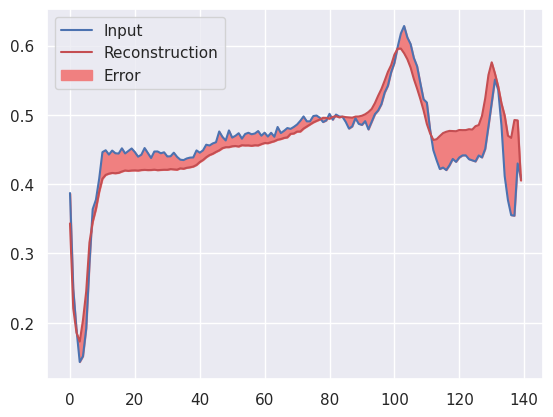

In [124]:
# Plot for abnormal

encoded_output_test = autoencoder.encoder(abnormal_test_data).numpy()
decoded_output_test = autoencoder.decoder(encoded_output_test).numpy()

i = 10
plt.plot(normal_test_data[i], 'b', label="Input")
plt.plot(decoded_output_test[i], 'r', label="Reconstruction")
plt.fill_between(np.arange(140), decoded_output_test[i], normal_test_data[i], color='lightcoral', label="Error")
plt.legend()
plt.show()

74/74 [==============================] - 0s 2ms/step


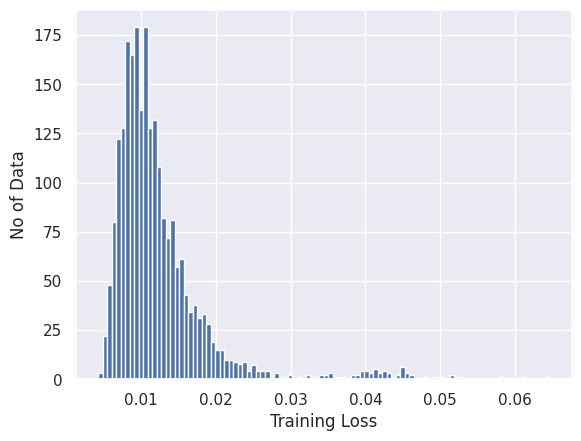

Threshold:  0.019153817


In [130]:
# Detecting anomaly
reconstructed = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructed, normal_train_data)

plt.hist(train_loss, bins=100)
plt.xlabel("Training Loss")
plt.ylabel("No of Data")
plt.show()
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

14/14 [==============================] - 0s 2ms/step


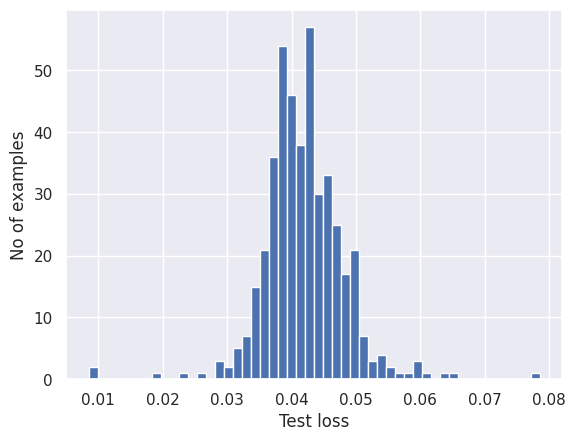

In [133]:
reconstructions = autoencoder.predict(abnormal_test_data)
test_loss = tf.keras.losses.mae(reconstructions, abnormal_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()